In [ ]:
from numpy import *
import math
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#Canny Edge Detection START

img = cv.imread('assets/actor.jpg', 0)
edges = cv.Canny(img,100,100)  #If we decrease any threshold more detailed image

# Skip every n-th point along the edges
n = 2
reduced_edges2 = np.zeros_like(edges)
for row in range(edges.shape[0]):
    reduced_edges2[row, np.arange(0, edges.shape[1], n)] = edges[row, np.arange(0, edges.shape[1], n)]

# plt.subplot(131),plt.imshow(img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(132),plt.imshow(edges,cmap = 'gray')
# plt.title('Edges'), plt.xticks([]), plt.yticks([])
# plt.subplot(133),plt.imshow(reduced_edges2,cmap = 'gray')
# plt.title(f'Edges Reduced by {n} p'), plt.xticks([]), plt.yticks([])
# plt.show()


#Canny Edge Detection END

a1 = 0  # length of link a1 in cm #AKINITO agnoiste to-oti timi ke na tu valoume den allazei to apotelesma
a2 = 12 # length of link a2 in cm # 1o link
a3 = 0  # length of link a3 in cm #Den exume 3o link emeis opote giafto eine 0
a4 = 14.5 # length of link a4 in cm #2o link



l=math.cos(math.pi/4)*(a2+a4) #h kolla mas eine l*l

m1=len(reduced_edges2) #diastaseis tou reduced_edges2 x-axis
m2=len(reduced_edges2[0]) #diastaseis tou reduced_edges2 y-axis
#scale stis diastaseis tin kollas mas
if m1>m2:
    l1=l
    l2=l*m2/m1 
else:
    l2=l
    l1=l*m1/m2



y_axis_lambda=l2/len(reduced_edges2) 
x_axis_lambda=l1/len(reduced_edges2[0])

x_points=[]
y_points=[]
for i in range(len(reduced_edges2)):
    for j in range(len(reduced_edges2[0])):
        if reduced_edges2[i][j]==255:
            x_points.append(l1-j*x_axis_lambda)
            y_points.append(l2-i*y_axis_lambda)

# Desired Position of End effector
x = [-k for k in x_points] #because our Xs are negative
y = y_points

theta_1 = []
theta_2 = []
for i in range(len(x)):
    # Equations for Inverse kinematics
    r1 = sqrt(x[i]**2+y[i]**2)  # eqn 1
    phi_1 = arccos((a4**2-a2**2-r1**2)/(-2*a2*r1))  # eqn 2
    phi_2 = arctan2(y[i], x[i])  # eqn 3
    theta_1.append(rad2deg(phi_2-phi_1))  # eqn 4 converted to degrees

    phi_3 = arccos((r1**2-a2**2-a4**2)/(-2*a2*a4))
    theta_2.append(180-rad2deg(phi_3))

print('theta one: ', theta_1) #servo 1
print('theta two: ', theta_2) #servo 2



#write txt file for theta_1 values (servo 1)
with open(r'theta_1.txt', 'w') as fp:
    for item in theta_1:
        # write each item on a new line
        fp.write("%s\n" % item)
fp.close()

#write txt file for theta_2 values(servo 2)
with open(r'theta_2.txt', 'w') as fp2:
    for item2 in theta_2:
        # write each item on a new line
        fp2.write("%s\n" % item2)
fp2.close()

## My Version

In [2]:
from numpy import *
import math
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#Canny Edge Detection START

img = cv.imread('assets/actor.jpg', 0)
edges = cv.Canny(img,100,100)  #If we decrease any threshold more detailed image

# Skip every n-th point along the edges
n = 2
reduced_edges2 = np.zeros_like(edges)
for row in range(edges.shape[0]):
    reduced_edges2[row, np.arange(0, edges.shape[1], n)] = edges[row, np.arange(0, edges.shape[1], n)]


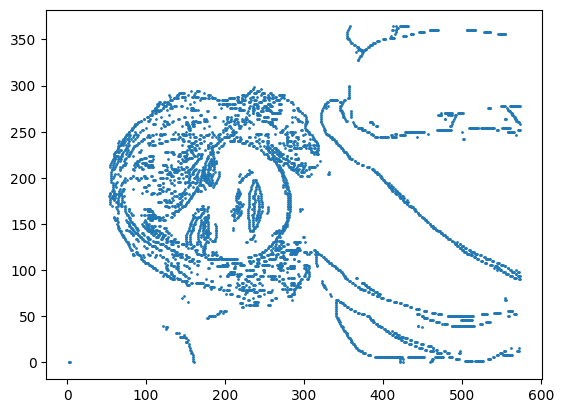

In [16]:
y = np.where(reduced_edges2 == 255)[1]
x = np.where(reduced_edges2 == 255)[0]

plt.scatter(x, y, s=1)

In [17]:
# print(reduced_edges2[:5,:])
norm_y = np.where(reduced_edges2==255)[1] / reduced_edges2.shape[1]
norm_x = np.where(reduced_edges2==255)[0] / reduced_edges2.shape[0]

In [35]:
scaled_y = norm_y * 12 + 2
scaled_x = norm_x * 21 - 23

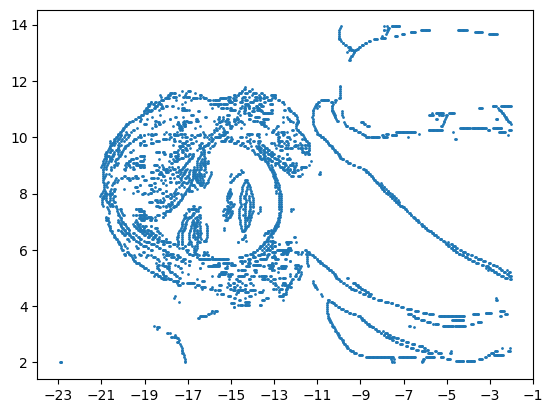

In [36]:
plt.xticks(np.arange(-23, 0, 2))
plt.scatter(scaled_x, scaled_y, s=1)

In [37]:

theta_1 = []
theta_2 = []
for i in range(len(scaled_x)):
    # Equations for Inverse kinematics
    r1 = sqrt(scaled_x[i]**2+scaled_y[i]**2)  # eqn 1
    phi_1 = arccos((a4**2-a2**2-r1**2)/(-2*a2*r1))  # eqn 2
    phi_2 = arctan2(scaled_y[i], scaled_x[i])  # eqn 3
    theta_1.append(rad2deg(phi_2-phi_1))  # eqn 4 converted to degrees

    phi_3 = arccos((r1**2-a2**2-a4**2)/(-2*a2*a4))
    theta_2.append(180-rad2deg(phi_3))

print('theta one: ', theta_1) #servo 1
print('theta two: ', theta_2) #servo 2



#write txt file for theta_1 values (servo 1)
with open(r'theta_1v2.txt', 'w') as fp:
    for item in theta_1:
        # write each item on a new line
        fp.write("%s\n" % item)
fp.close()

#write txt file for theta_2 values(servo 2)
with open(r'theta_2v2.txt', 'w') as fp2:
    for item2 in theta_2:
        # write each item on a new line
        fp2.write("%s\n" % item2)
fp2.close()

theta one:  [142.04565246588862, 141.85823429738105, 141.67158691634157, 123.9782047112226, 123.73737778354473, 123.17110509447946, 123.8056340242962, 123.75094241506844, 123.69758070512438, 123.64555541096884, 123.49756492656056, 122.94583014998858, 123.0442621695035, 123.00554410844012, 122.96823844019623, 122.93235321970124, 122.8978966711112, 122.86487719384253, 122.72164293538457, 123.48427523260128, 123.26497605246838, 123.21347775403102, 123.06707089858028, 122.63678696223008, 122.60620348148784, 122.49854527656909, 123.07538556899533, 123.02348532680917, 122.82935619924011, 122.78422564899512, 122.74046974010697, 122.69809567951708, 122.57933879360328, 122.38017508012759, 122.3520493916321, 122.27653909626899, 122.78299173604421, 122.73337527876771, 122.68510954680269, 122.34844245031793, 122.12809872012404, 122.05562641207027, 122.03446470693167, 122.01481732398604, 123.36355488323201, 123.29657201647439, 122.75158420038764, 122.54349702883862, 122.01846572366077, 121.90522849

## Test lib tinyik